In [1]:
import numpy as np
import pandas as pd

# for basic analysis
import scipy

# data Visualization tools
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns


sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('melb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [3]:
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8233,Port Melbourne,204/52 Nott St,2,u,575000.0,S,Biggin,13/05/2017,3.8,3207.0,...,1.0,1.0,7159.0,61.0,2008.0,Port Phillip,-37.84100,144.93860,Southern Metropolitan,8648.0
10254,Epping,2/12 Chettam St,3,u,380500.0,SP,Iconek,27/05/2017,19.6,3076.0,...,2.0,1.0,156.0,NaN,2013.0,Whittlesea,-37.63490,145.04042,Northern Metropolitan,10926.0
9857,Deer Park,32 Kynoch St,4,h,650000.0,S,YPA,24/06/2017,14.8,3023.0,...,2.0,2.0,709.0,NaN,NaN,Brimbank,-37.76336,144.77250,Western Metropolitan,6388.0
11928,Camberwell,1/43 Inglesby Rd,2,u,682000.0,S,Jellis,29/07/2017,7.7,3124.0,...,1.0,1.0,1106.0,NaN,1970.0,Boroondara,-37.83473,145.05698,Southern Metropolitan,8920.0
210,Altona North,4 Prismall St,3,h,988000.0,S,Sweeney,22/08/2016,11.1,3025.0,...,1.0,4.0,715.0,NaN,2008.0,Hobsons Bay,-37.84230,144.86320,Western Metropolitan,5132.0
4183,Moorabbin,10 Beilby St,3,h,800000.0,PI,hockingstuart,26/07/2016,14.6,3189.0,...,2.0,2.0,261.0,107.0,1990.0,Kingston,-37.94290,145.04740,Southern Metropolitan,2555.0
4363,North Melbourne,2/150 Arden St,2,u,440000.0,PI,hockingstuart,16/04/2016,2.3,3051.0,...,1.0,1.0,0.0,NaN,1960.0,Melbourne,-37.80040,144.94650,Northern Metropolitan,6821.0
9321,South Melbourne,1211/50 Albert Rd,2,u,530000.0,VB,Greg,3/06/2017,1.9,3205.0,...,1.0,1.0,1646.0,52.0,2012.0,Port Phillip,-37.83406,144.97131,Southern Metropolitan,5943.0
11643,Dandenong North,7 Belmont Av,3,h,560000.0,S,Barry,22/07/2017,24.7,3175.0,...,1.0,2.0,630.0,NaN,NaN,Greater Dandenong,-37.96543,145.20339,South-Eastern Metropolitan,8322.0
9464,Burnley,2/50 Gibdon St,3,h,1100000.0,VB,hockingstuart,17/06/2017,2.4,3121.0,...,2.0,2.0,1212.0,NaN,2010.0,Yarra,-37.82982,145.01038,Northern Metropolitan,438.0


In [4]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

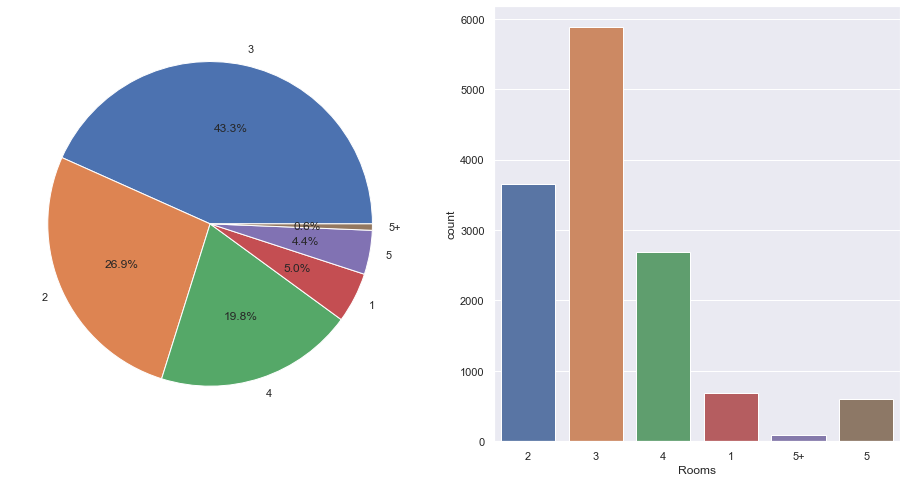

In [5]:
# Let us categorize with respect to number of rooms
fig_num_rooms, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

by_room_number = df['Rooms'].copy()

## All the houses with rooms more than 5 will me categorized into 5+
by_room_number[by_room_number>5] = '5+'
rooms_count = by_room_number.value_counts()

## Data prep for countplot
data_count = df['Rooms'].copy()
data_count[data_count>5] = '5+'

df_count = pd.DataFrame(data_count.value_counts())
df_count.index.names=['count']
ax1.pie(x=df_count['Rooms'].values,labels=df_count.index.values,autopct='%1.1f%%',)
sns.countplot(x=data_count,ax=ax2)
plt.show()

<ipython-input-6-016fa4d0e8f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"


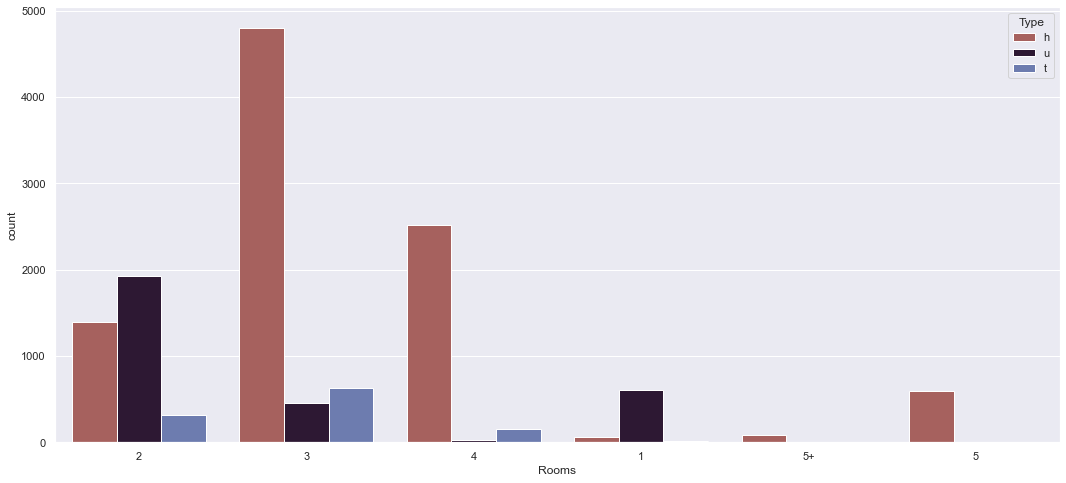

In [6]:
## Let us categorize the number of rooms with respect ot types
df_room_change = df.copy()
df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"
plt.figure(figsize=(18,8))
sns.countplot(data=df_room_change,x='Rooms',hue='Type',palette='twilight_r')
plt.show()

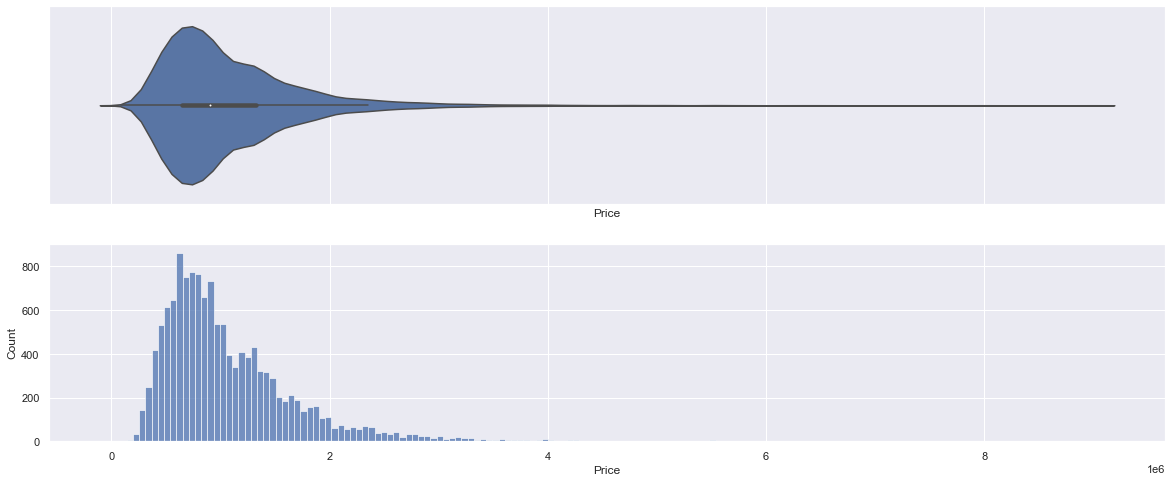

In [7]:
# Overall Price Distribution
fig_price,(ax1,ax2) = plt.subplots(2,1,figsize=(20,8),sharex=True)
sns.violinplot(x='Price',data=df,ax=ax1)
sns.histplot(x='Price',data=df,ax=ax2)
plt.show()

## Let us look at the Retail sellers in Melbourne 

In [8]:
df_room_change['SellerG'].nunique()

268

<h4>There are total '<b><i>268</i></b>' Sellers in this dataset</h4>
      <p>Let us select the top 10 Sellers in this dataset and the rest will be tagged as others</p>

In [9]:
top_10_sellers = df_room_change['SellerG'].value_counts().index.values[:10]
pd.DataFrame(df_room_change['SellerG'].value_counts()[:10])

,SellerG
Nelson,1565
Jellis,1316
hockingstuart,1167
Barry,1011
Ray,701
Marshall,659
Buxton,632
Biggin,393
Brad,342
Fletchers,301


In [10]:
## Top 10 sellers in Melbourne
def check_seller(name):
    if name not in top_10_sellers:
        return False
    else:
        return True
df_sellers_data = df_room_change.copy()

In [11]:
df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"

<ipython-input-11-d61de001c2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"


In [12]:
 df_top_10_sellers = df_sellers_data[df_sellers_data['SellerG']!="Other"]

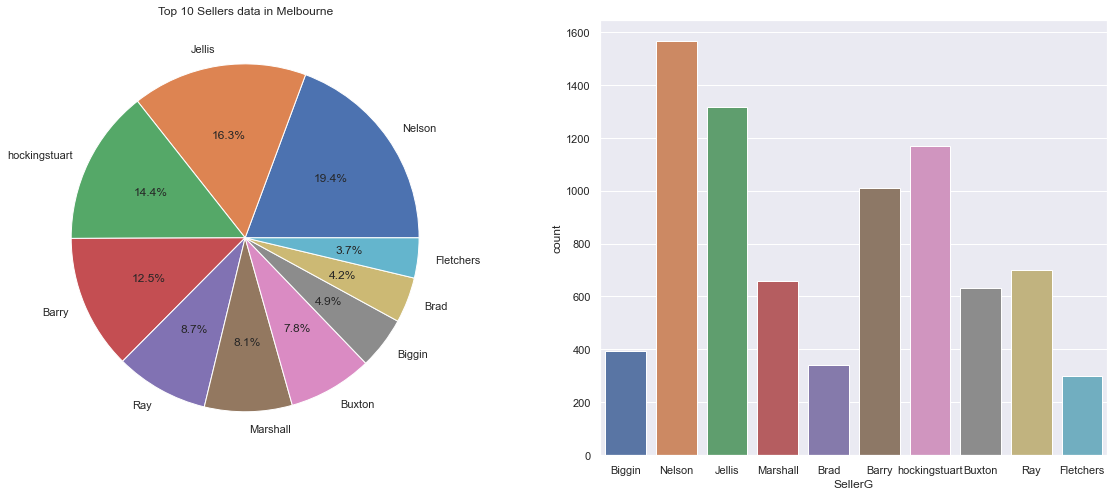

In [13]:
## Plot for the top 10 sellers in melbourne
fig_seller , (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
seller_labels = df_top_10_sellers['SellerG'].value_counts().index.values
ax1.pie(x=df_top_10_sellers['SellerG'].value_counts(),labels=seller_labels,autopct="%1.1f%%")
ax1.set_title("Top 10 Sellers data in Melbourne")
sns.countplot(data=df_top_10_sellers,x='SellerG',ax=ax2)
plt.show()

### We can also find out the Sellers with respect to the Regions they work in

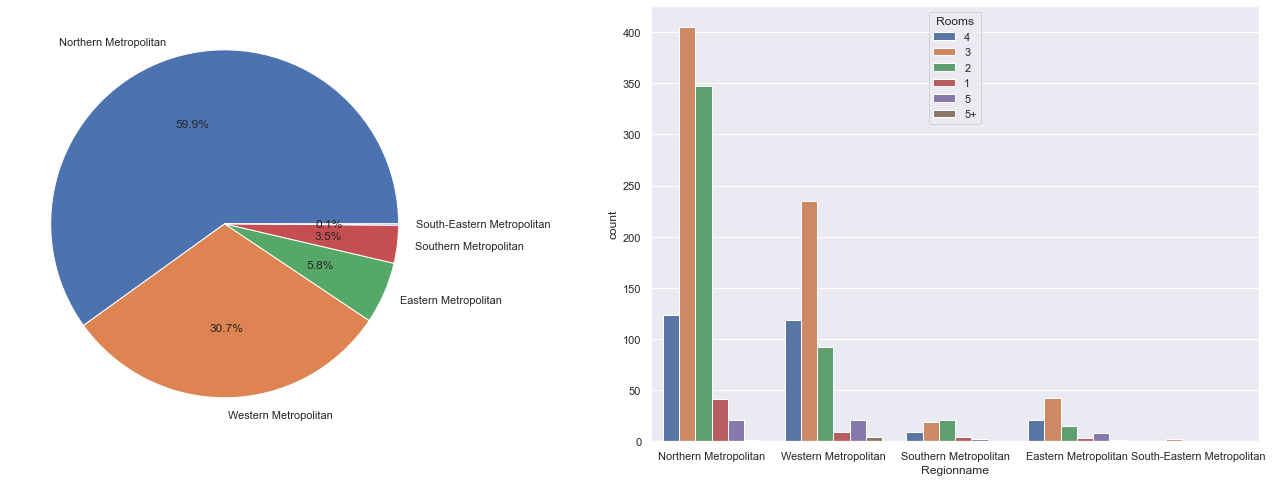

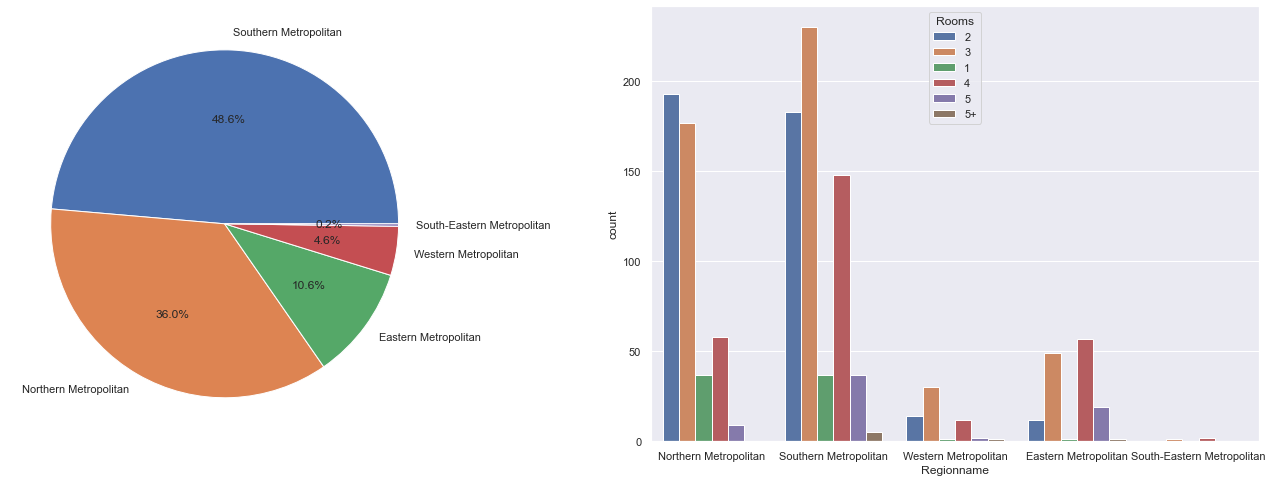

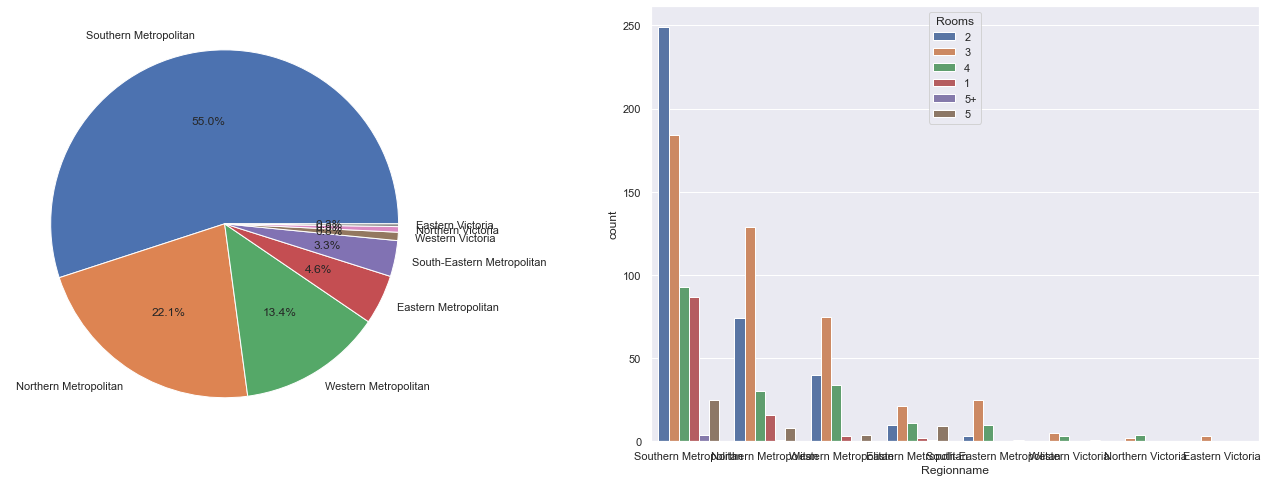

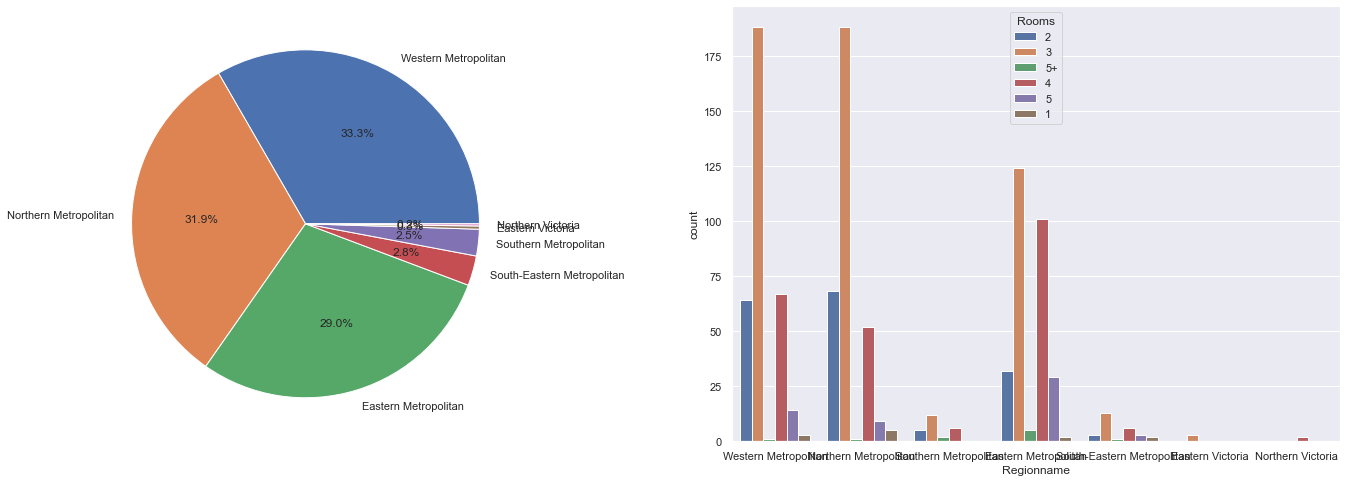

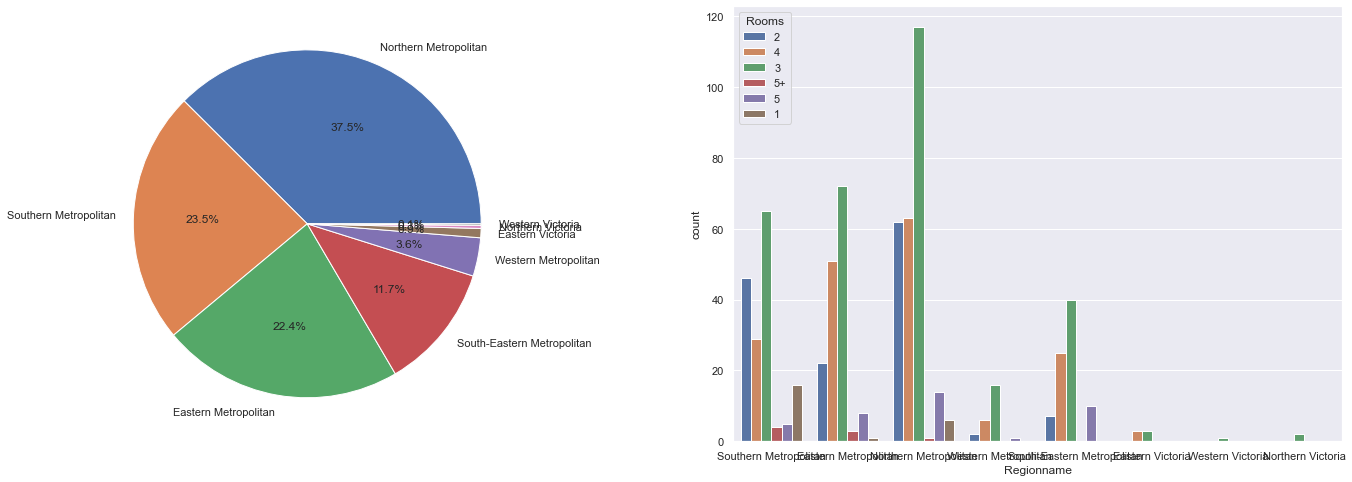

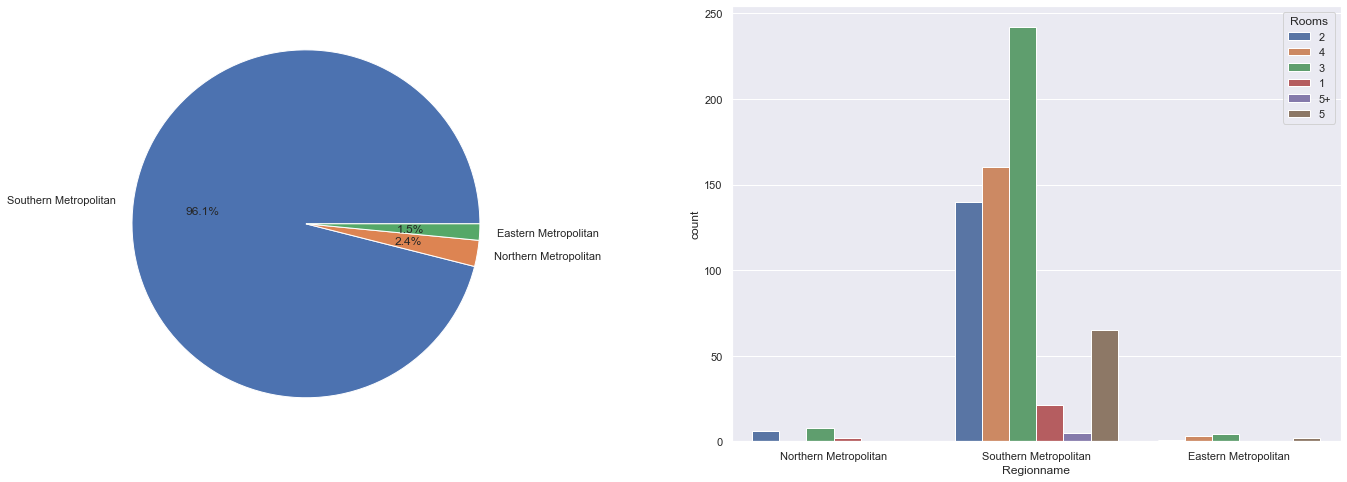

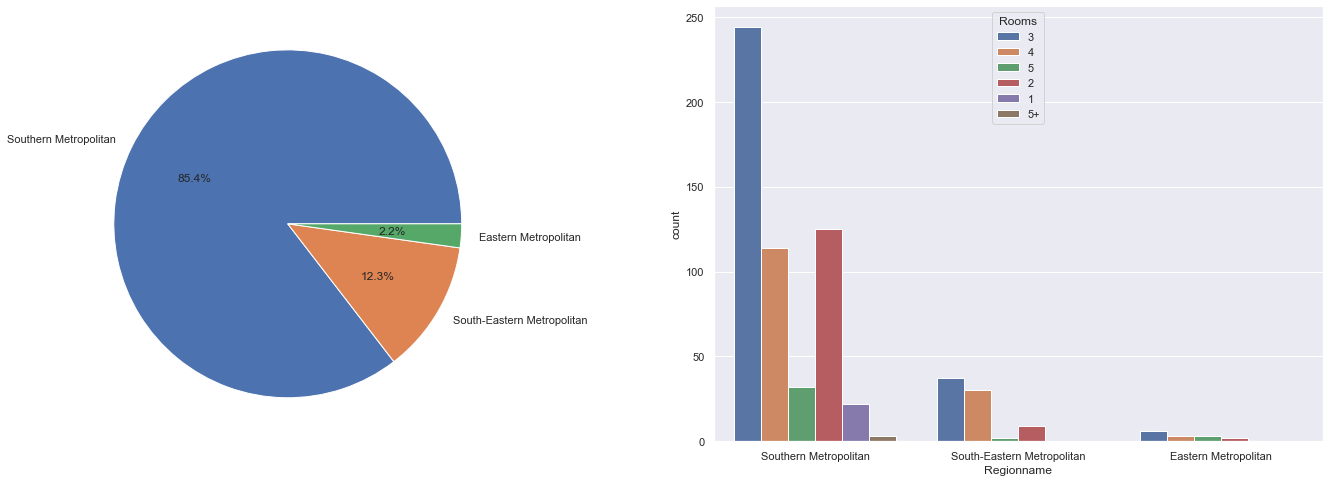

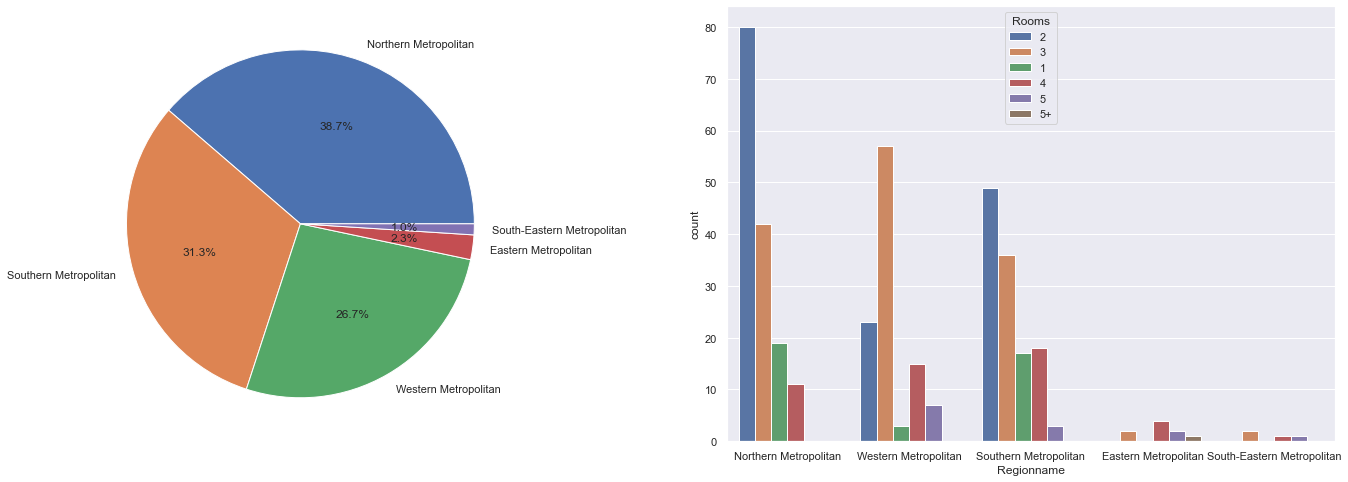

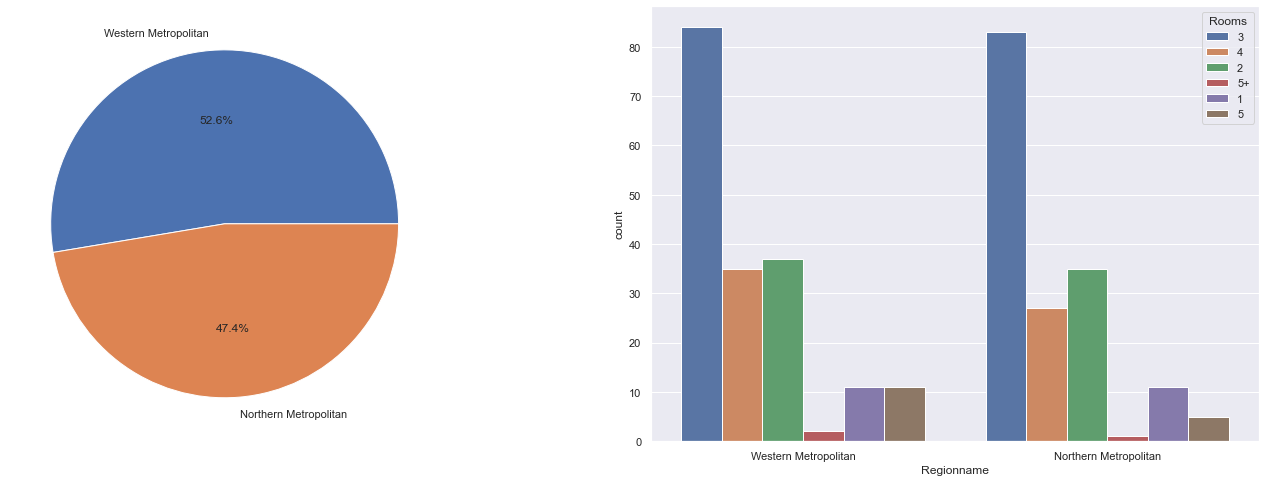

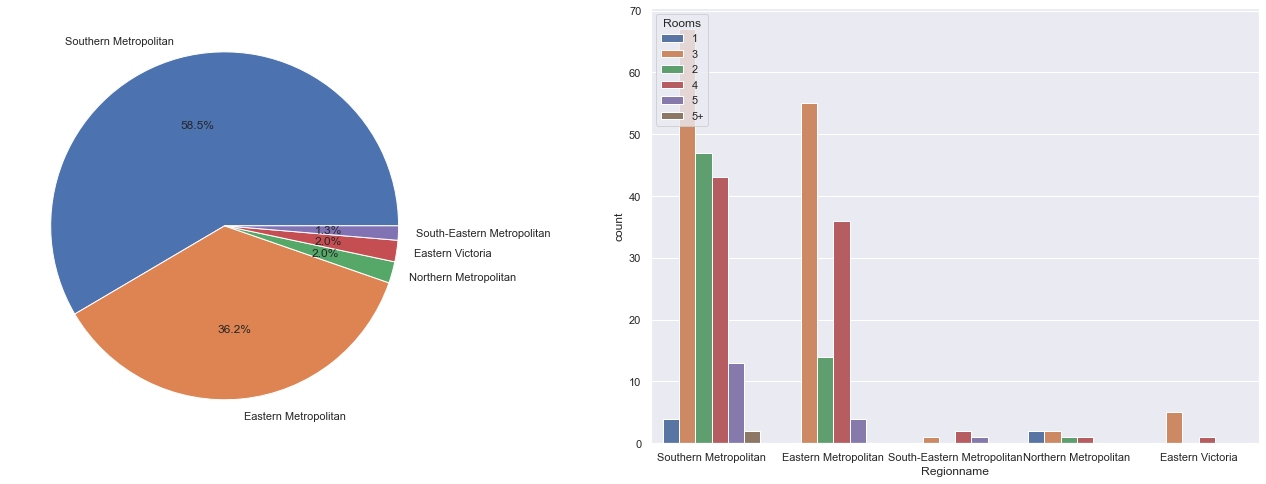

In [14]:
for seller in top_10_sellers:
    dummy_data = df_top_10_sellers[df_top_10_sellers['SellerG'] == seller]
    fig_seller, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    region_labels = dummy_data['Regionname'].value_counts().index.values
    ax1.pie(x=dummy_data['Regionname'].value_counts().values,labels=region_labels,autopct="%1.1f%%")
    sns.countplot(data=dummy_data,x="Regionname",hue='Rooms')
    plt.show()

## Let us look at the price and Rooms distribution on a regional Basis

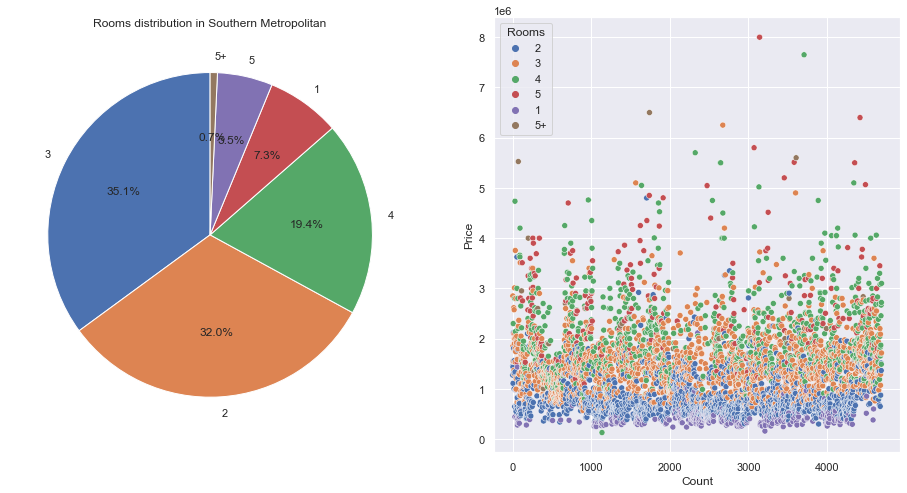

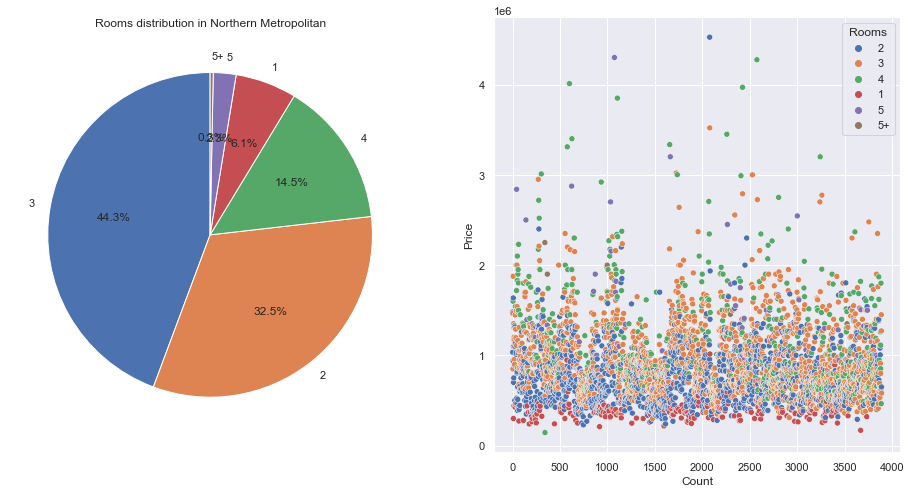

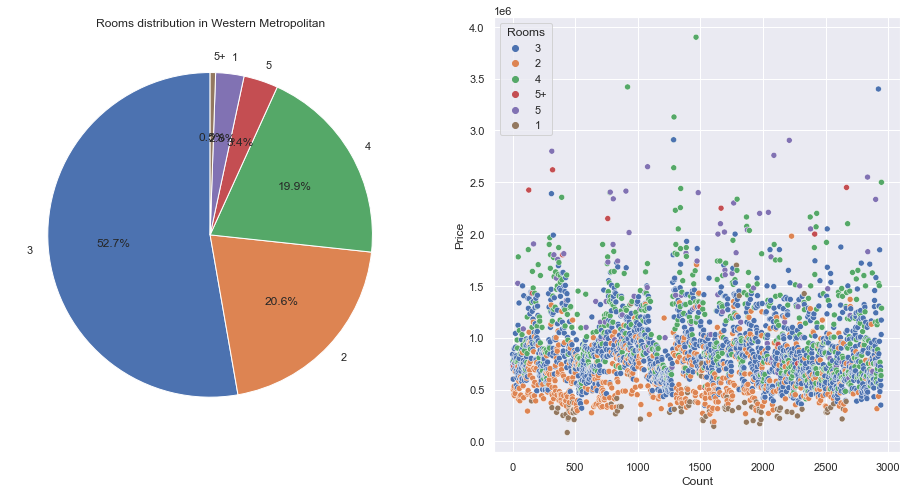

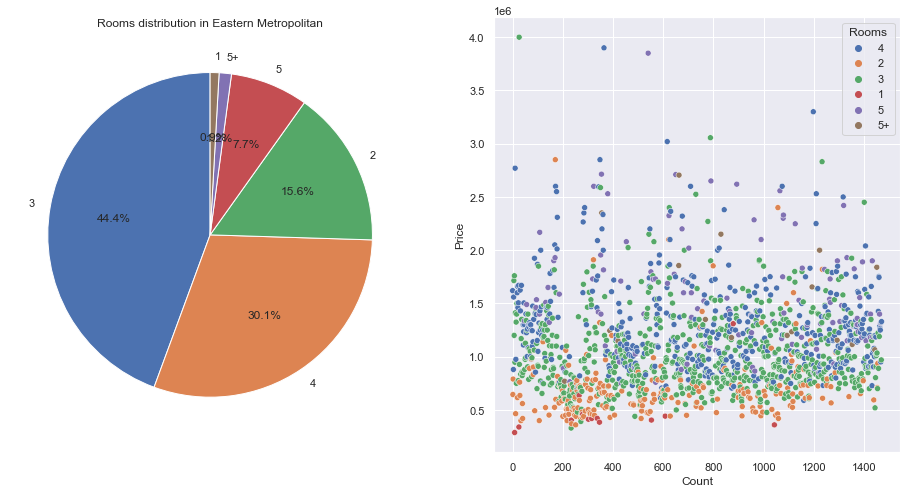

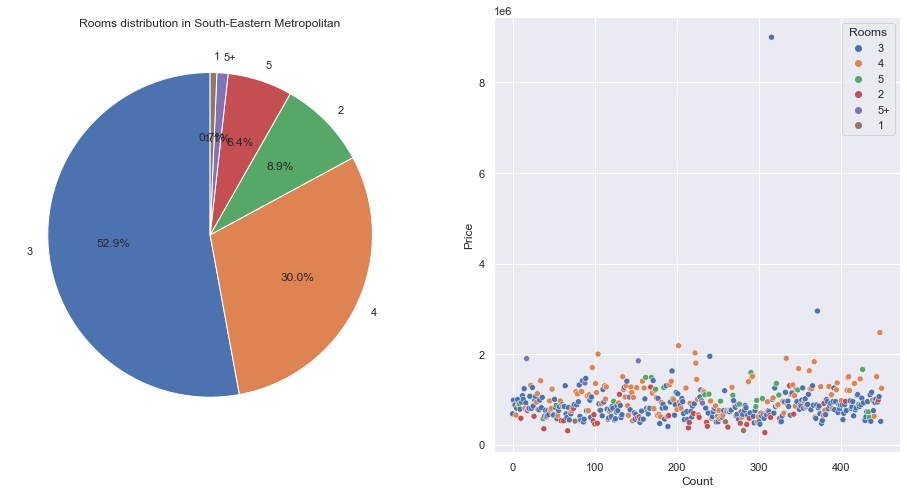

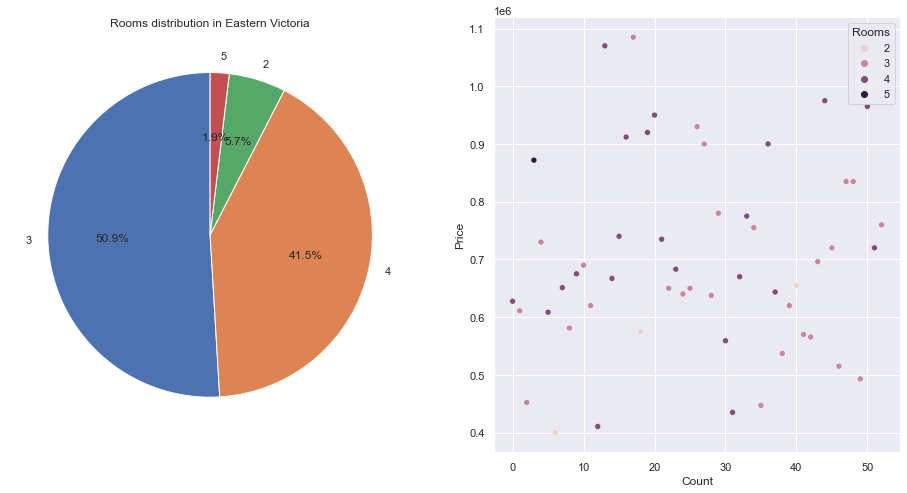

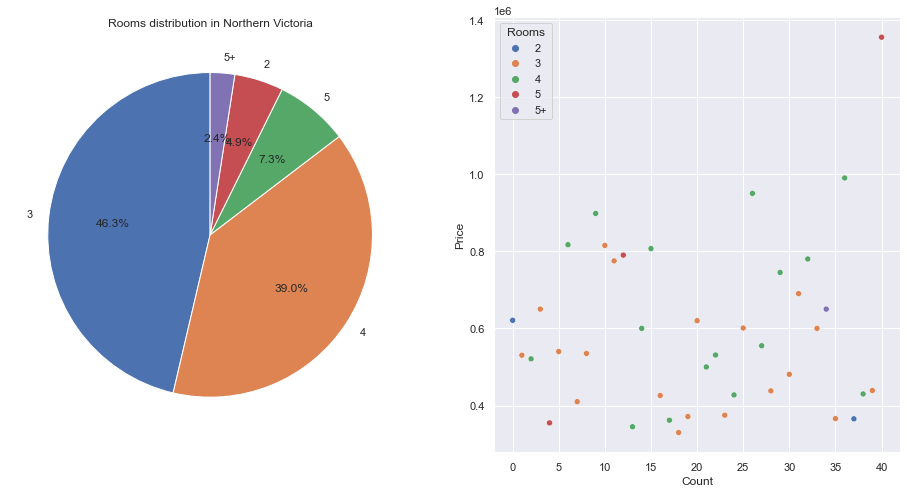

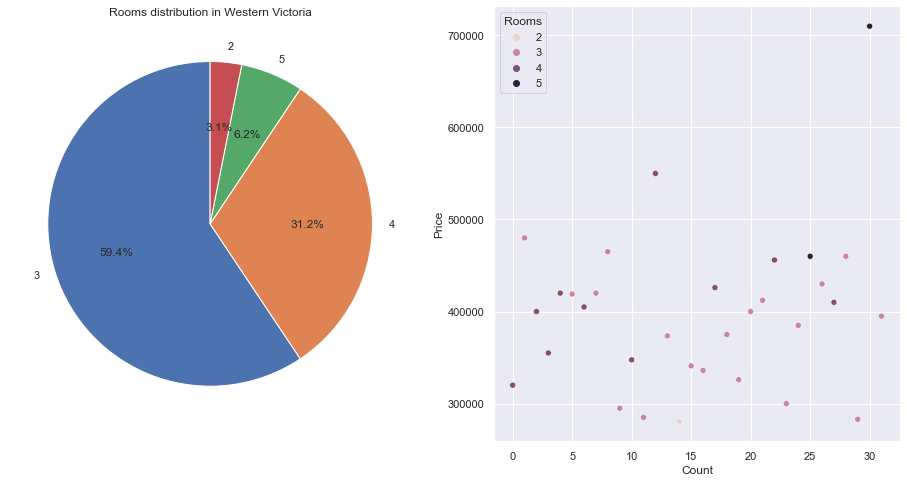

In [15]:
region_names = df_room_change['Regionname'].value_counts().index.values
for region in region_names:
    region_df = df_room_change[df_room_change["Regionname"]==region].copy()
    region_df['count_index'] = range(len(region_df))
    fig_regional_dist, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
    rooms_for_region_label = region_df['Rooms'].value_counts().index.values
    rooms_for_region_values = region_df['Rooms'].value_counts().values
    ax1.pie(x=rooms_for_region_values,labels=rooms_for_region_label,autopct="%1.1f%%",startangle=90)
    ax1.set_title(f"Rooms distribution in {region}")
    sns.scatterplot(data=region_df,x='count_index',y='Price',hue='Rooms')
    ax2.set_xlabel('Count')
    plt.show()

## Let us see correlation  between all the columns

<AxesSubplot:>

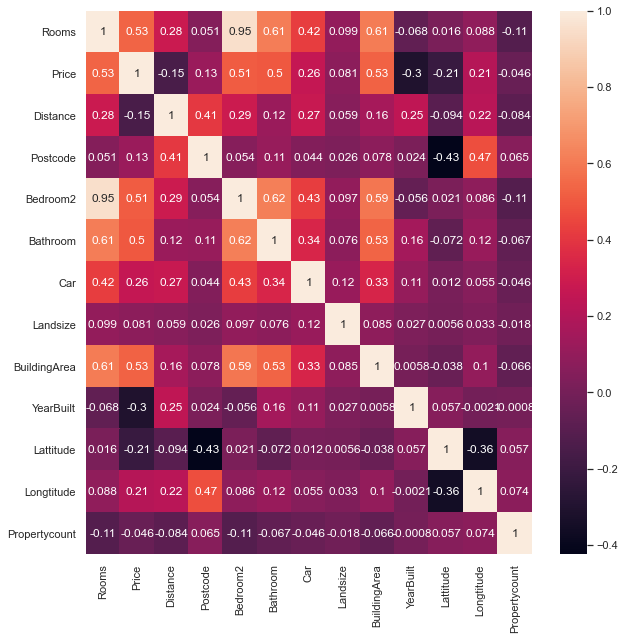

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.dropna().corr(),annot=True)

## If Price was the main Criteria then according to the Heatmap Price is best influenced by 
<ol type='1'>
        <li>Rooms</li>
        <li>Building Area</li>
        <li>Beedroom2</li>
      </ol>

In [17]:
df_date_data = df_room_change.copy()

In [18]:
sr=pd.to_datetime(df_date_data['Date'])
df_date_data['Month'] = sr.dt.month_name(locale = 'English')
df_date_data['Year'] = pd.DatetimeIndex(df_date_data['Date']).year

In [19]:
df_date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  object 
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

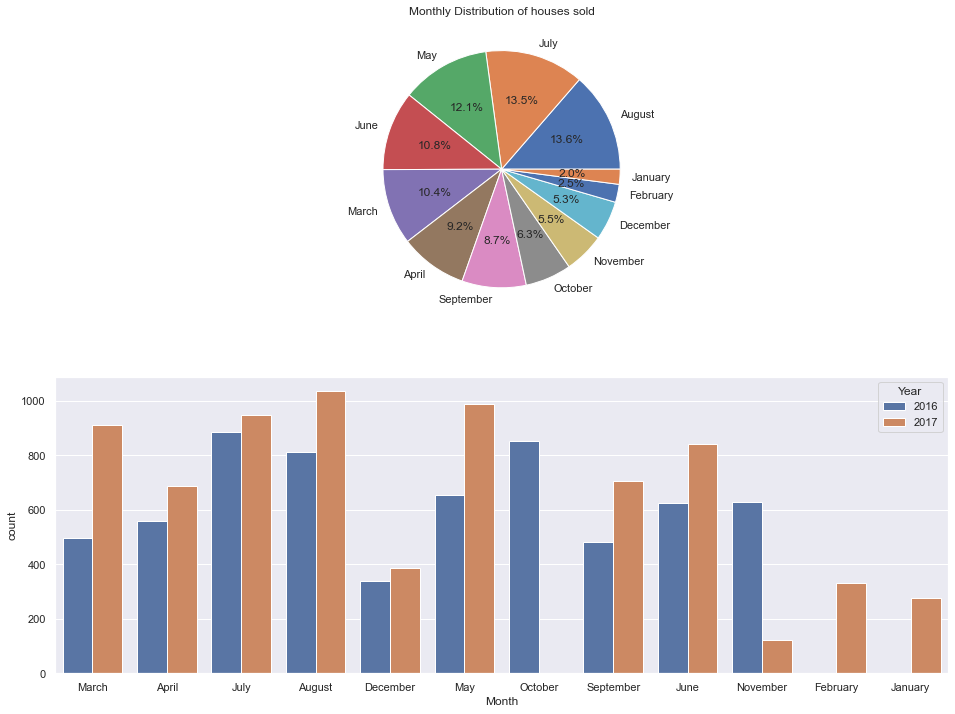

In [20]:
fig_month,(a1,a2) = plt.subplots(2,1,figsize=(16,12)) 
sns.countplot(data=df_date_data,x='Month',hue='Year',ax=a2)
month_labels = df_date_data['Month'].value_counts().index.values
sold_counts = df_date_data['Month'].value_counts().values
a1.pie(x=sold_counts,labels=month_labels,autopct="%1.1f%%")
a1.set_title("Monthly Distribution of houses sold")
plt.show()

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

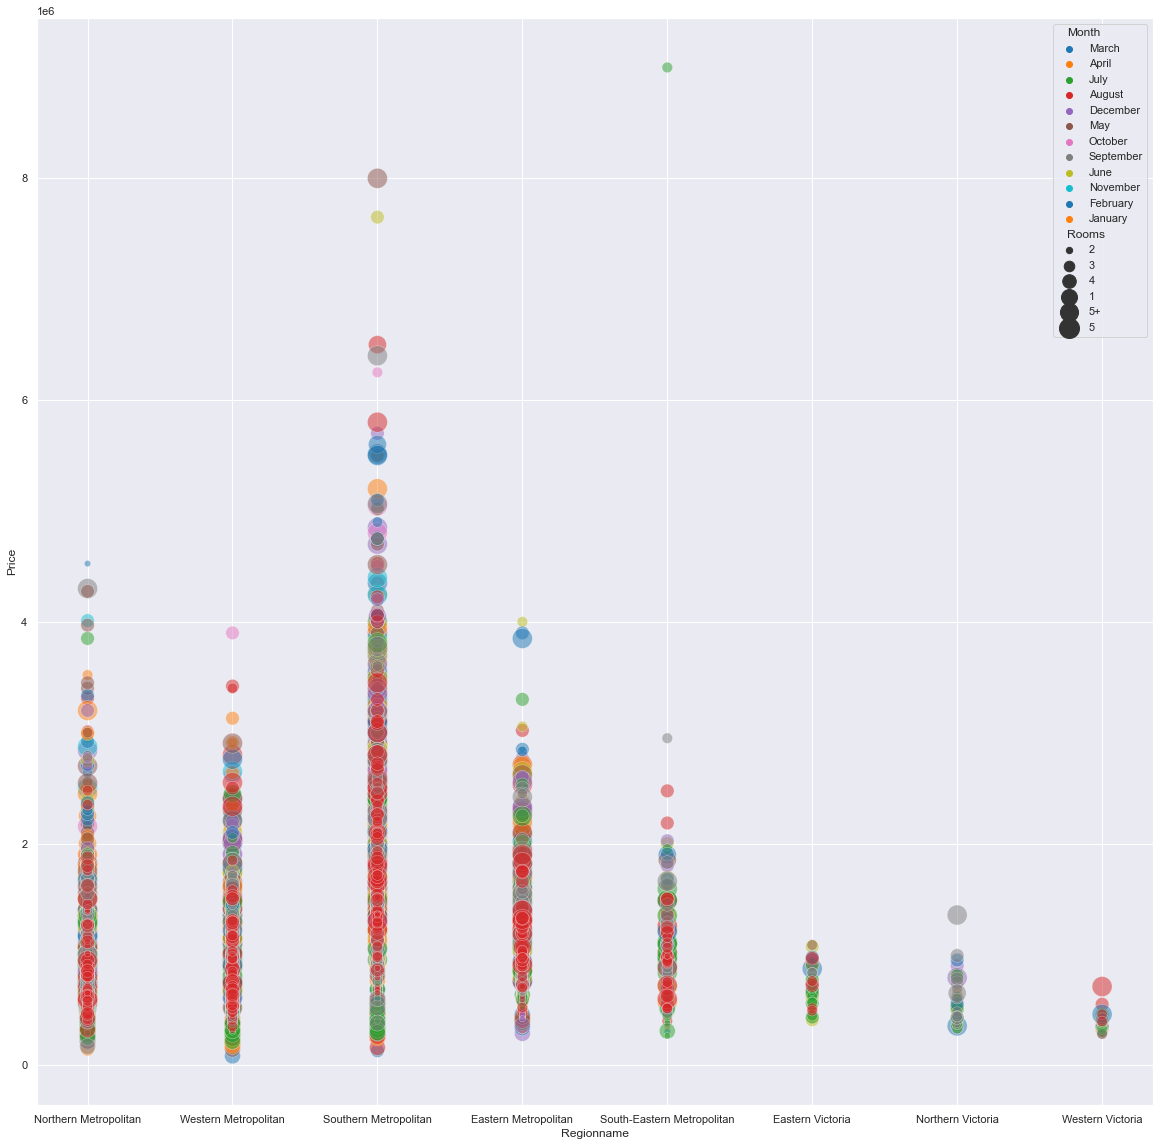

In [21]:
## Classification with respect to monthly prices with respect to region and room size
plt.figure(figsize=(20,20))
sns.scatterplot(data=df_date_data,x='Regionname',y='Price',hue="Month",size="Rooms", sizes=(400, 40),alpha=0.5,palette='tab10')

# Regionwise Plot for Houses in Melbourne

<AxesSubplot:xlabel='Lattitude', ylabel='Longtitude'>

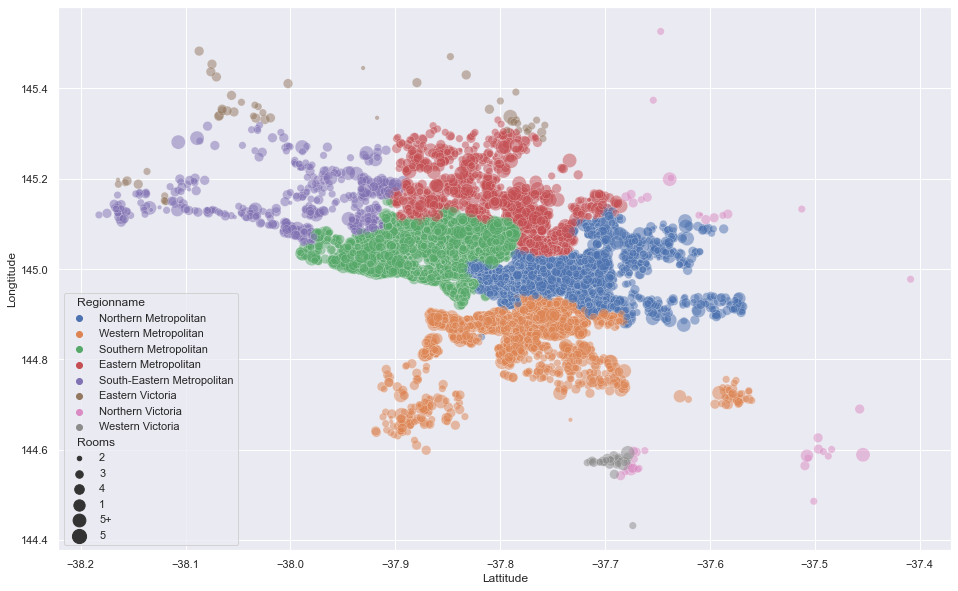

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_room_change,x='Lattitude',y='Longtitude',hue="Regionname",size="Rooms",sizes=(200,20),alpha=0.5)

## top 10 sellerwise distribution plot

<AxesSubplot:xlabel='Lattitude', ylabel='Longtitude'>

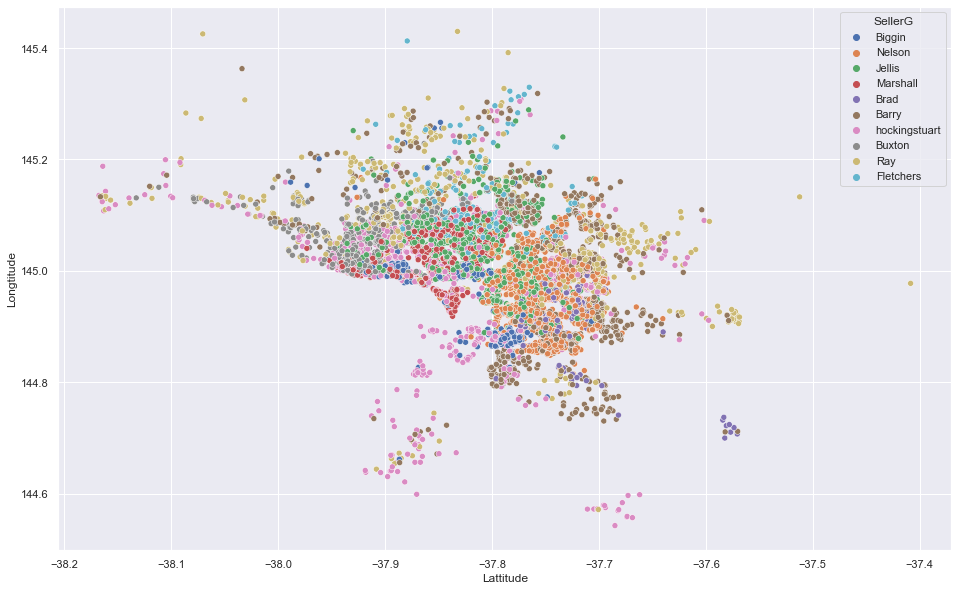

In [23]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_top_10_sellers,x='Lattitude',y='Longtitude',hue="SellerG")